In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Get csv data path
repo_dir = os.path.dirname(os.path.abspath(""))
csv_path = os.path.join("..","data","Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240326.csv")

# Load data
#dataFile = pd.read_csv(csv_path)
dataFile = pd.read_csv(csv_path)
dataFile.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


In [25]:
dataFile['Date'] = pd.to_datetime(dataFile['Date'])
target_year = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
wantedCategory = ["PROSTITUTION"]

In [26]:
target_years_idx = dataFile['Date'].dt.year.isin(target_year)
category_idx = dataFile["Category"].isin(wantedCategory)

crimeData = dataFile[target_years_idx & category_idx]

crimeData = crimeData.groupby(['Date']).size().reset_index(name= "counts")

crimeData["Year"] = crimeData["Date"].dt.year
crimeData

crimeData = crimeData.groupby(['Year']).size().reset_index(name= "counts")

/var/folders/n8/5rhx_j3j6m799_8b7_npmt8w0000gn/T/ipykernel_26697/787640897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.barplot(x="Year", y="counts", data=crimeData, dodge=False, palette='mako')


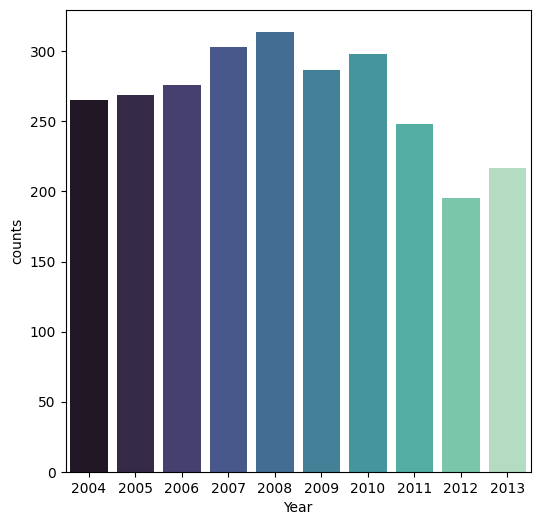

In [27]:
_ = plt.figure(figsize=(6, 6), dpi = 100) 
_ = sns.barplot(x="Year", y="counts", data=crimeData, dodge=False, palette='mako')
plt.show()

Did prostitution reach its peak in 2008? To answer this question, we delve into data collected by the San Francisco Police Department spanning from 2003 to 2017. This dataset encompasses various crime categories, each logged with timestamps and geographical coordinates.
Focusing specifically on the prostitution category within the years 2004 to 2013, intriguing trends emerge. It appears that the incidence of prostitution-related crimes surged in 2007 and 2008, only to steadily decline thereafter. By 2012, the data reveals the lowest recorded rate of such offenses over the preceding decade.
In this exploration, we aim to dissect the temporal patterns of prostitution crimes, shedding light on shifts in societal behaviors and law enforcement efforts over the examined timeframe.

In [28]:
crimeData

,Year,counts
0,2004,265
1,2005,269
2,2006,276
3,2007,303
4,2008,314
5,2009,287
6,2010,298
7,2011,248
8,2012,195
9,2013,217


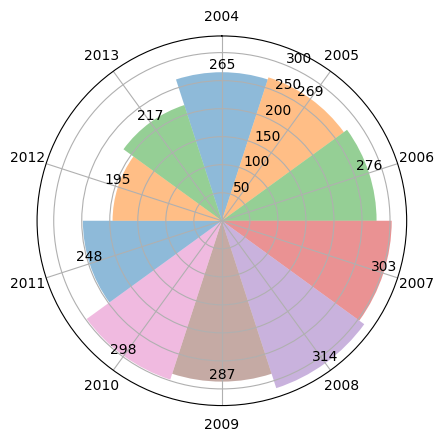

In [29]:
N = 10
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2 * np.pi / N


category10_palette = [
    (31, 119, 180),  # Blue
    (255, 127, 14),  # Orange
    (44, 160, 44),   # Green
    (214, 39, 40),   # Red
    (148, 103, 189), # Purple
    (140, 86, 75),   # Brown
    (227, 119, 194)]

#custom_colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']  # Assuming crime_counts is a list/array containing counts for each year

category10_colors = [(r / 255, g / 255, b / 255) for (r, g, b) in category10_palette]

ax = plt.subplot(projection='polar')
bars = ax.bar(theta, crimeData["counts"], width=width, bottom=0.0, color=category10_colors, alpha=0.5)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Setting custom labels for each year
years = np.arange(2004, 2014)  # Assuming the data starts from 2014 and spans 10 years
ax.set_xticks(theta)
ax.set_xticklabels(years)

# Adding labels to each bar
for bar, count in zip(bars, crimeData["counts"]):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(count), ha='center', va='bottom')

plt.show()

2008 is the year with the most cases of prostitution as it reaches 293 incidents. 2012 the number of incidents is significally lower at 172. 

# Create Bokeh visualization html file 

In [39]:
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Category10
from bokeh.models import ColumnDataSource
from bokeh.models import FactorRange
from bokeh.models import Legend

In [40]:
crimeDataDay = dataFile[target_years_idx & category_idx]
crimeDataDay["Year"] = crimeDataDay["Date"].dt.year
#crimeDataDay = crimeDataDay.groupby(['Year']).size().reset_index(name= "counts")
crimeDataDay = crimeDataDay.groupby(['DayOfWeek',"Year"]).size().reset_index(name= "counts")
crimeDataDay

/var/folders/n8/5rhx_j3j6m799_8b7_npmt8w0000gn/T/ipykernel_21936/3438689910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimeDataDay["Year"] = crimeDataDay["Date"].dt.year


,DayOfWeek,Year,counts
0,Friday,2004,211
1,Friday,2005,132
2,Friday,2006,168
3,Friday,2007,202
4,Friday,2008,115
...,...,...,...
65,Wednesday,2009,247
66,Wednesday,2010,148
67,Wednesday,2011,123
68,Wednesday,2012,96


In [41]:
# TODO: create bokeh plot
p = figure(width=800, height=400, x_axis_label="Year", y_axis_label="Counts")

#Define a palette
palette = Category10[7]

# Group by DayOfWeek and iterate over each group
for i, (day, group) in enumerate(crimeDataDay.groupby('DayOfWeek')):
    color = palette[i % len(palette)]  # Select color from palette cyclically
    p.line(group['Year'], group['counts'], line_width=2, color=color, alpha=0.8, legend_label=day)

# Set legend position and click policy
p.legend.location = "top_left"
p.legend.click_policy = "mute"

#Show all years
p.xaxis.ticker = crimeDataDay['Year'].unique()

# display the figure
#show(p)

# save bokeh plot to htlm file
bokeh_fname = os.path.join(repo_dir, "assets", "interactive_bokeh_viz.html")
print(f"Saving file {bokeh_fname}")
output_file(bokeh_fname)

Saving file /Users/kajsa/Desktop/assignment/AfonsoCunha22.github.io/assets/interactive_bokeh_viz.html
